# <font color="red"> problem statement </font>

# Using `preceptronic trick` to find the best seperator on given data


In [40]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [2]:
# reading the data
df = pd.read_csv(r"/content/drive/MyDrive/iris_modified.csv")
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [3]:
#droping unwanted column
df=df.drop(["Unnamed: 0"],axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# cheching the column names
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
# cheking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [6]:
# checking the null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
#  checking dupicates values
df.duplicated(keep="first").sum()

0

# observation  
- There are no duplicate values in data frame

In [8]:
# statistically wat to calculate the mead and median and other values of the data frame
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,100.0,NaN,NaN,NaN,5.471,0.641698,4.3,5.0,5.4,5.9,7.0
sepal_width,100.0,NaN,NaN,NaN,3.099,0.478739,2.0,2.8,3.05,3.4,4.4
petal_length,100.0,NaN,NaN,NaN,2.861,1.449549,1.0,1.5,2.45,4.325,5.1
petal_width,100.0,NaN,NaN,NaN,0.786,0.565153,0.1,0.2,0.8,1.3,1.8
species,100,2,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# observations
- There are two species in target features
- The mean and median so closer so may be no outliers

# data visualization

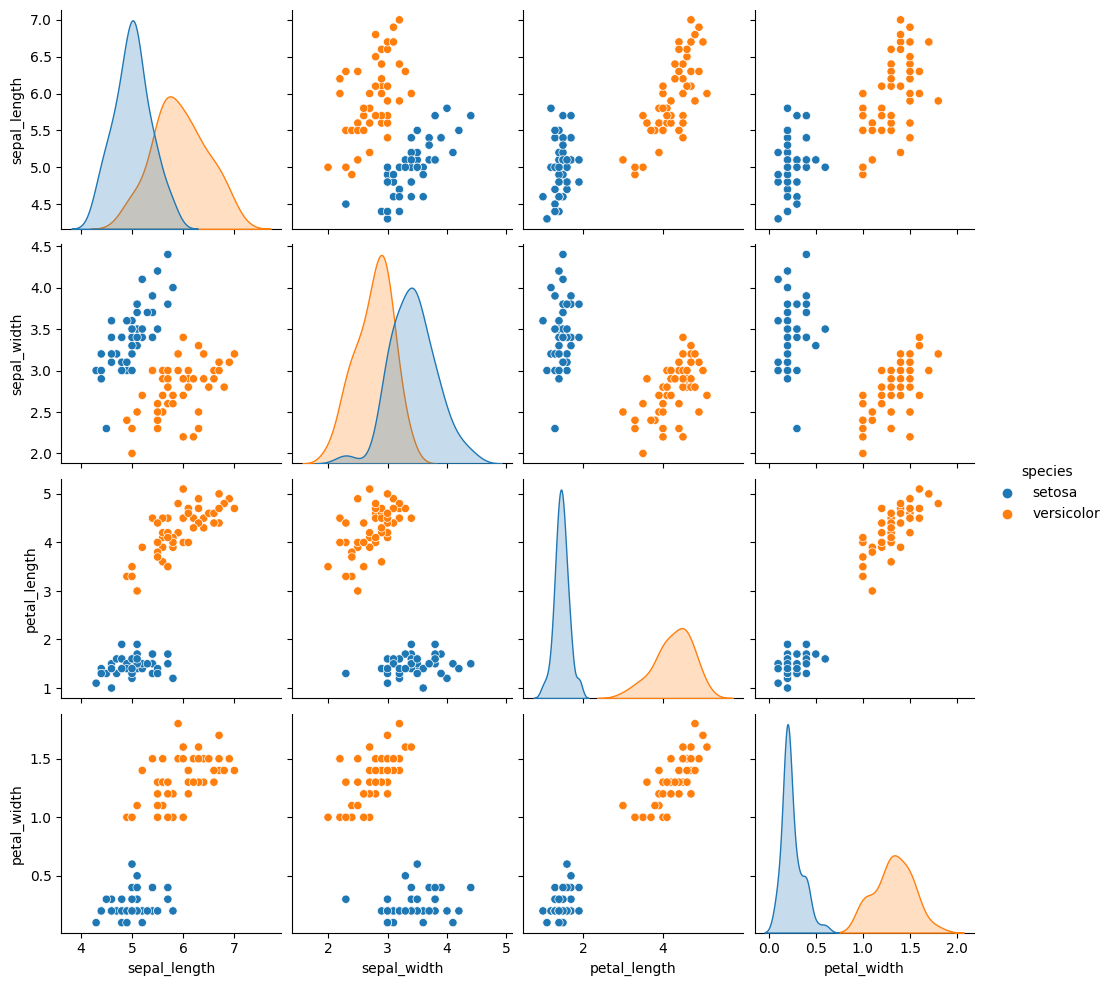

In [9]:
sns.pairplot(data=df,hue="species")

# observations
- The petal width and petal length both features are linearly seperated.
- Hence these two features are enough to performing classification task
df

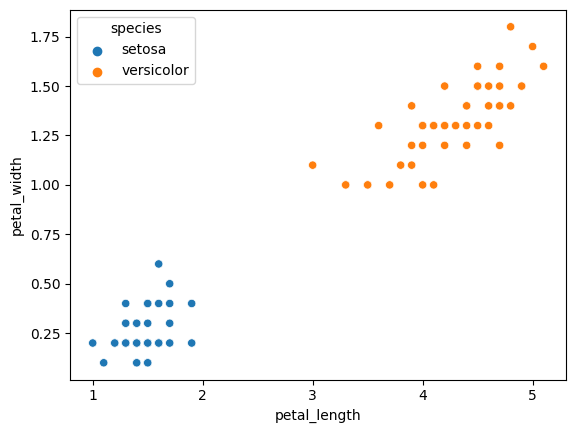

In [22]:
sns.scatterplot(x=df["petal_length"],y=df["petal_width"],hue=df["species"])
plt.show()

# univariate analysis

In [23]:
def univariate_numeric_vis_analysis(df):
    for i in df.columns:

        print(i)
        #code of boxplot
        plt.figure(figsize=(10,5))
        sns.boxplot(x=df[i])
        plt.title(f"boxplot of {i}")
        plt.show()

        # code of histogram plot
        plt.figure(figsize=(10,5))
        df[i].plot(kind="hist")
        plt.title(f"hitogram of {i}")
        plt.show()


        # code of denisity plot
        plt.figure(figsize=(10,5))
        df[i].plot(kind="kde")
        plt.title(f"density plot of {i}")
        plt.show()

        mean_ =df[i].mean()
        print(f"mean--->{i}",mean_)


        median_ =df[i].median()
        print(f"median--->{i}",median_)

        skew_ =df[i].skew()
        print(f"skewness--->{i}",skew_)


        kurt_ =df[i].kurt()
        print(f"kurtosis--->{i}",kurt_)


        print("*"*100)



In [24]:
num = df.select_dtypes(["float"])
num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


sepal_length


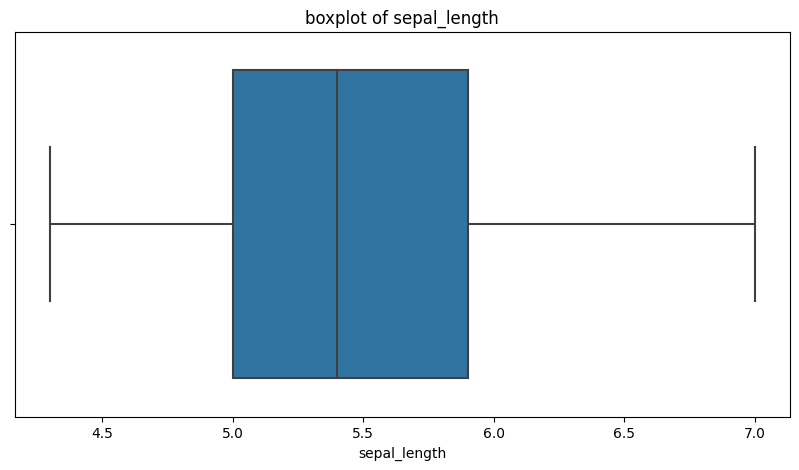

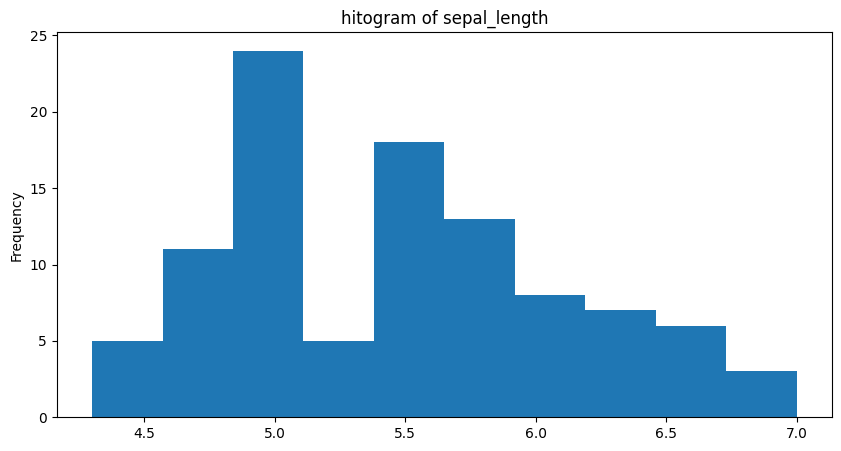

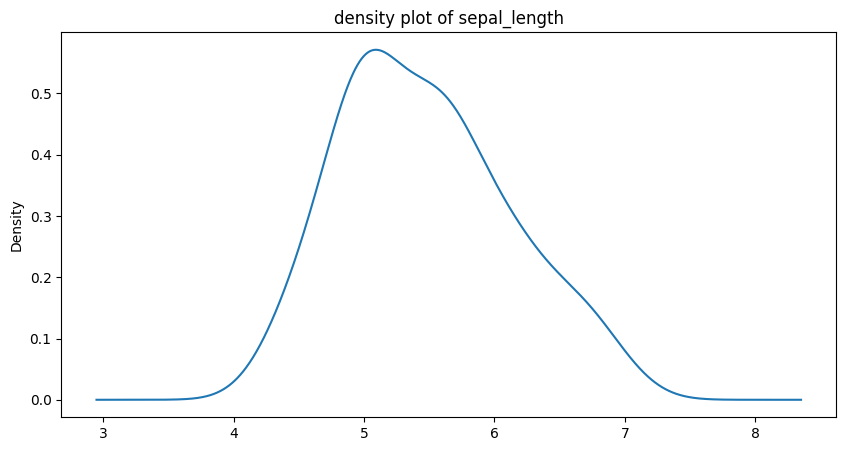

mean--->sepal_length 5.471000000000001
median--->sepal_length 5.4
skewness--->sepal_length 0.41535262224442443
kurtosis--->sepal_length -0.5314832579605802
****************************************************************************************************
sepal_width


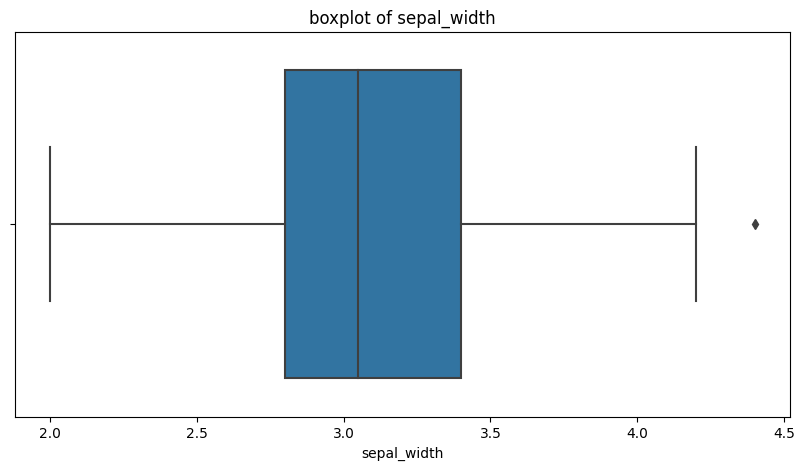

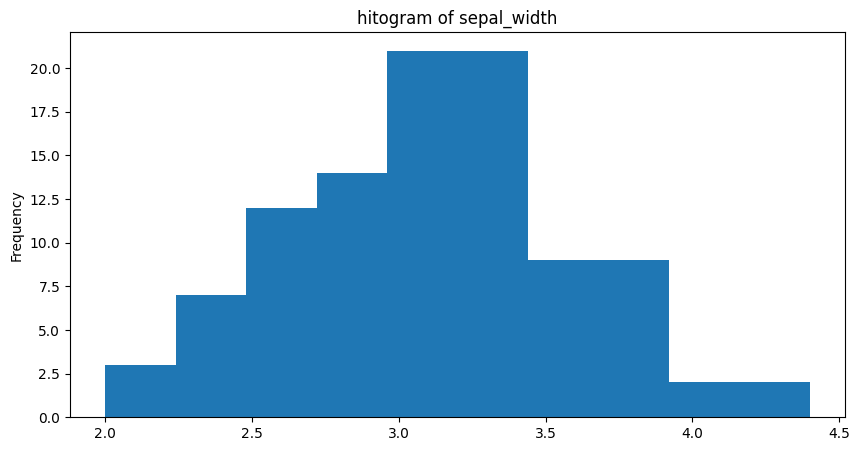

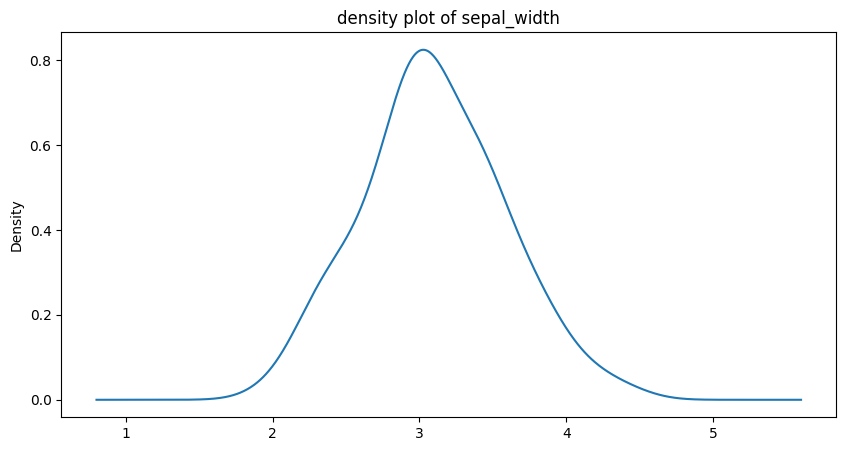

mean--->sepal_width 3.0989999999999998
median--->sepal_width 3.05
skewness--->sepal_width 0.16580763819728073
kurtosis--->sepal_width -0.10789345848576337
****************************************************************************************************
petal_length


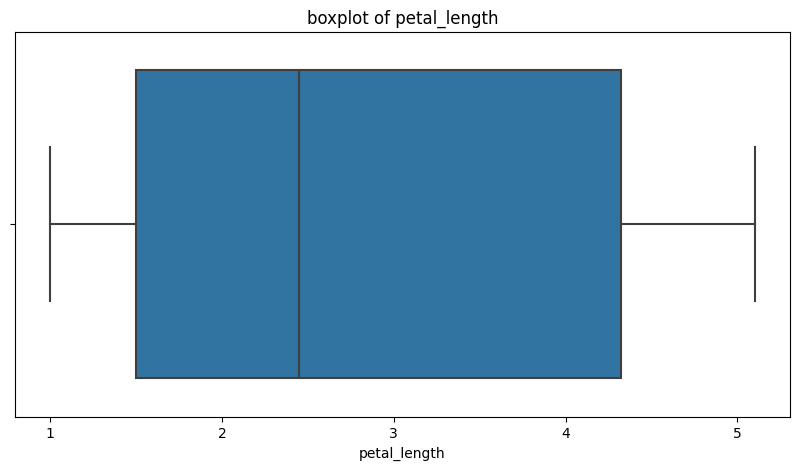

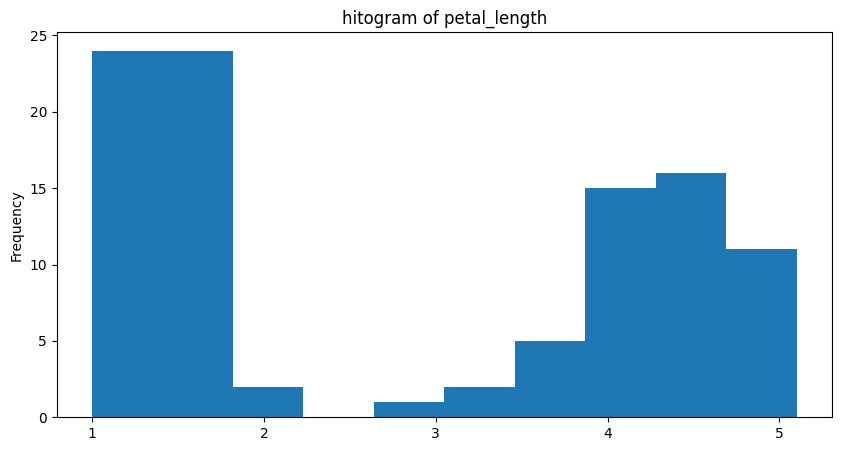

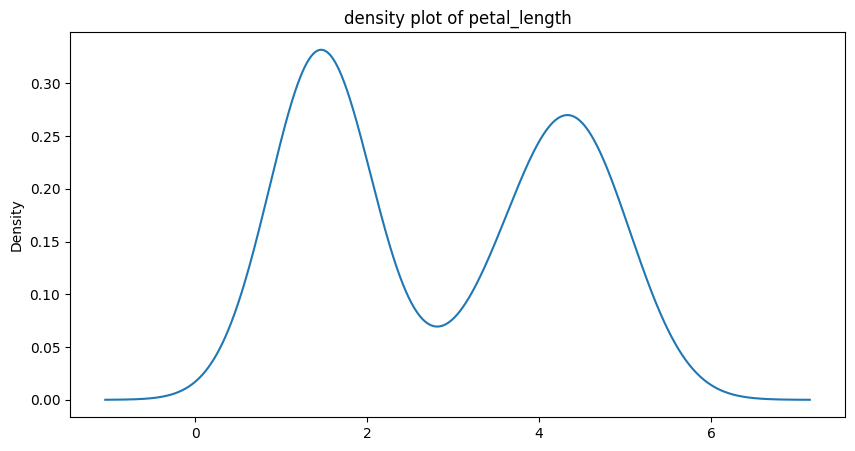

mean--->petal_length 2.861
median--->petal_length 2.45
skewness--->petal_length 0.12275754508352124
kurtosis--->petal_length -1.8344501149797987
****************************************************************************************************
petal_width


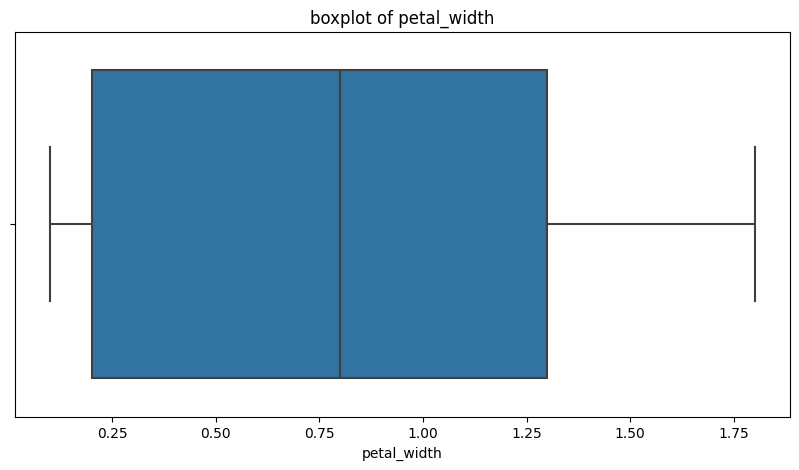

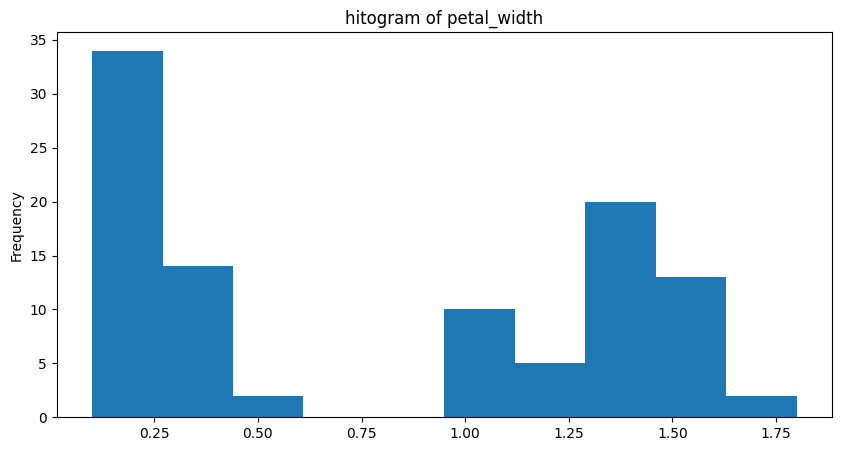

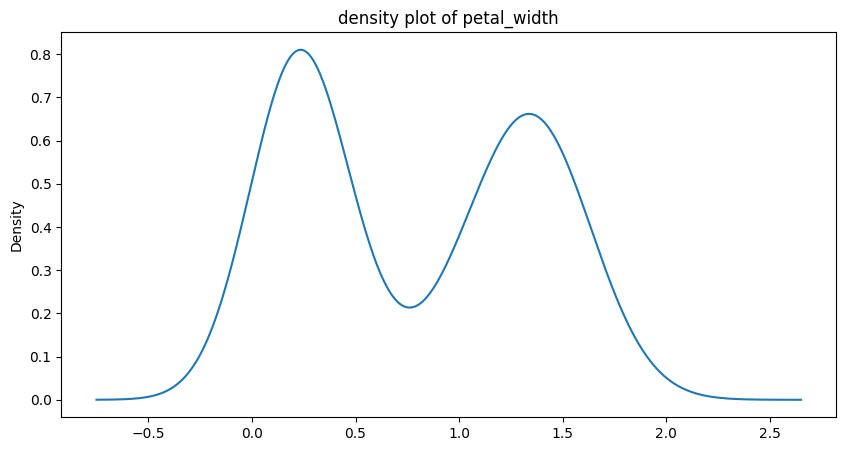

mean--->petal_width 0.7859999999999998
median--->petal_width 0.8
skewness--->petal_width 0.13020822294730436
kurtosis--->petal_width -1.741788832254775
****************************************************************************************************


In [25]:
univariate_numeric_vis_analysis(num)

In [33]:
# removing the outlier in sepal width column
df=df[df["sepal_width"]<=4.2]

In [26]:
cat = df["species"]

In [34]:
df.shape

(99, 5)

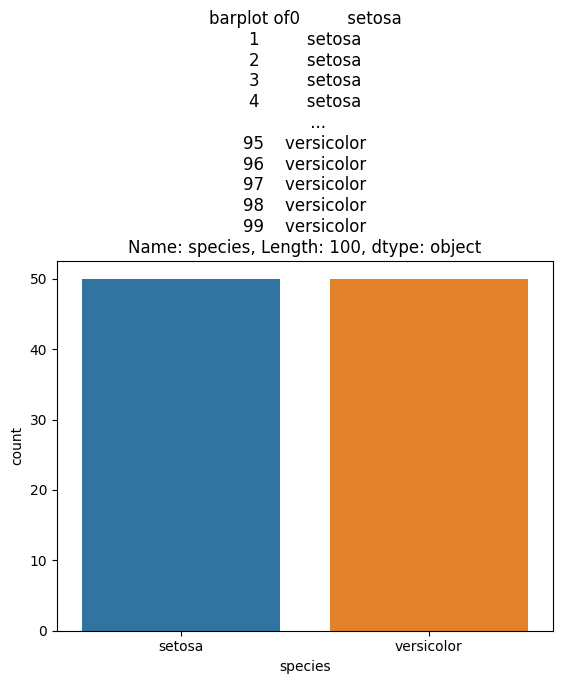

In [35]:
sns.countplot(data=cat,x=cat)
plt.title(f"barplot of{cat}")
plt.show()


In [36]:
df.species.value_counts()

versicolor    50
setosa        49
Name: species, dtype: int64

In [37]:
df.species.value_counts(normalize=True)

versicolor    0.505051
setosa        0.494949
Name: species, dtype: float64

# observation
- These species are balanced data

In [38]:
df['species'] = df['species'].apply(lambda x: 1 if x == "setosa" else 0) # convert the species to numeric representation

<ipython-input-38-488671825b2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].apply(lambda x: 1 if x == "setosa" else 0)


In [39]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0
96,5.7,2.9,4.2,1.3,0
97,6.2,2.9,4.3,1.3,0
98,5.1,2.5,3.0,1.1,0


In [77]:
learning_rate = 0.01
w0 = 1
w1 = rd.random()
w2 = rd.random()
W = [w1,w2,w0]


for _ in range(1500):
    for i in range(len(df)):
        index = np.random.choice(df.index)

        x = df.loc[index, ["petal_length", "petal_width"]].values
        y = df.loc[index, "species"]

        # dot product between weights and inputs
        z = np.dot(W[:2], x) + W[2]

        pred_label = 1 if z>0 else 0
        # checking for correctly classified
        if pred_label != y:
            # If not correctly classified
            if z > 0 and y==0:
                W[:2] -= learning_rate * x
                W[2] -= learning_rate
            elif z<0 and y==1:
                W[:2] += learning_rate * x
                W[2] += learning_rate
        else:
            break

w1, w2, w0 = W

print("Optimal Weights & Bias:", W)
print("Optimal inputs:",x)
print('------------------')

# Equation of a line using above optimal weights,inputs and bias
line_eqn = w1*x[0] + w2*x[1] + w0
print('line_equation:',line_eqn)
print('------------------')

# Finding slopes and intercept
m= -(w1/w2)
c= -(w0/w2)
print('slope:',m)
print('intercept:',c)

# to plot a graph using above slope equation
x_axis = np.linspace(0, 5, 99)
y_axis = m*x_axis + c

Optimal Weights & Bias: [-0.23184276189401612, -0.17805647259167284, 0.8099999999999998]
Optimal inputs: [3.5 1. ]
------------------
line_equation: -0.17950613922072933
------------------
slope: -1.3020743279896847
intercept: 4.549118536440562


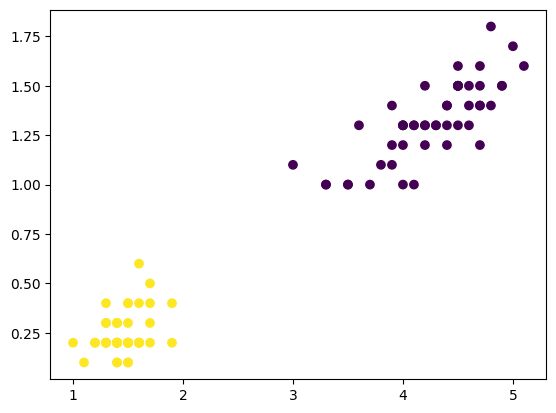

In [78]:
plt.scatter(x=df['petal_length'],y=df['petal_width'],c=df['species'])
plt.show()

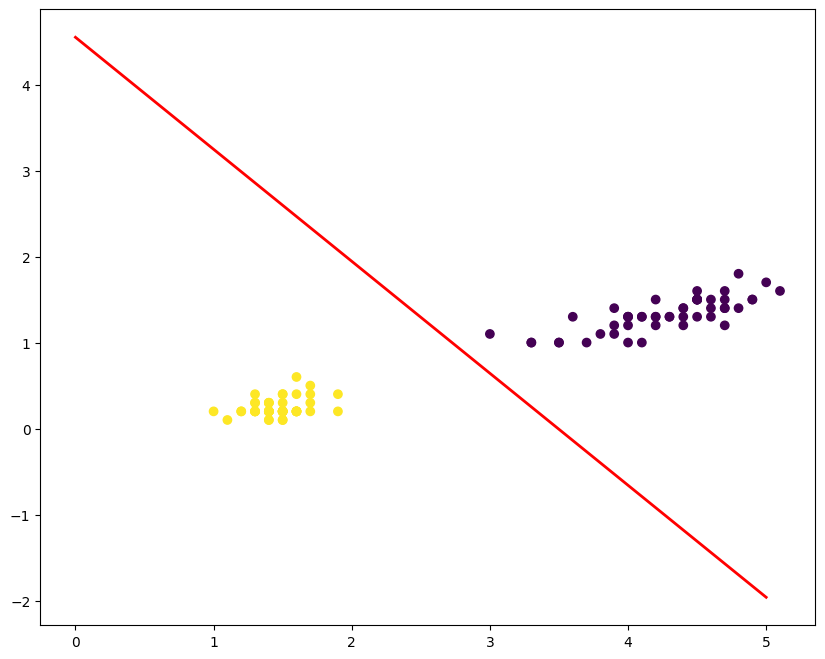

In [79]:
plt.figure(figsize=(10,8))
plt.plot(x_axis,y_axis,color="red",linewidth=2)
plt.scatter(x=df['petal_length'],y=df['petal_width'],c = df['species'])

plt.show()
